**importing dependencies**

In [3]:
import pandas
import numpy
import matplotlib.pyplot

In [2]:
import tensorflow

**importing bicoin history data**

In [4]:
data=pandas.read_csv('/content/bitcoin_2010-12-24_2024-07-24.csv')

In [5]:
data.shape

(4961, 8)

In [6]:
for i in range(4916//2):
  data.iloc[i],data.iloc[-i]=data.iloc[-i],data.iloc[i]

In [7]:
data

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-07-23,2024-07-24,67537.9900,67693.9900,65528.3700,65914.5500,1.151583e+11,1.312243e+12
1,2010-12-24,2010-12-25,0.2480,0.2480,0.2480,0.2480,0.000000e+00,1.228660e+06
2,2010-12-25,2010-12-26,0.2499,0.2499,0.2499,0.2499,0.000000e+00,1.238073e+06
3,2010-12-26,2010-12-27,0.2650,0.2650,0.2650,0.2650,0.000000e+00,1.312883e+06
4,2010-12-27,2010-12-28,0.2650,0.2650,0.2650,0.2650,0.000000e+00,1.316037e+06
...,...,...,...,...,...,...,...,...
4956,2024-07-18,2024-07-19,64159.9700,65088.9500,63253.1200,63966.1300,9.997780e+10,1.267402e+12
4957,2024-07-19,2024-07-20,63910.0400,67348.0400,63311.2600,66648.0300,1.016393e+11,1.281856e+12
4958,2024-07-20,2024-07-21,66699.5400,67536.3400,66263.2000,67182.4500,1.045535e+11,1.315703e+12
4959,2024-07-21,2024-07-22,67102.0000,68286.0300,66038.9600,68071.9900,8.967644e+10,1.323676e+12


In [8]:
data = data.drop(0)

In [9]:
data.head(5)

,Start,End,Open,High,Low,Close,Volume,Market Cap
1,2010-12-24,2010-12-25,0.2480,0.2480,0.2480,0.2480,0.0,1.228660e+06
2,2010-12-25,2010-12-26,0.2499,0.2499,0.2499,0.2499,0.0,1.238073e+06
3,2010-12-26,2010-12-27,0.2650,0.2650,0.2650,0.2650,0.0,1.312883e+06
4,2010-12-27,2010-12-28,0.2650,0.2650,0.2650,0.2650,0.0,1.316037e+06
5,2010-12-28,2010-12-29,0.2810,0.2810,0.2810,0.2810,0.0,1.399982e+06


**making windows and horizons**

In [10]:
def make_window_labels(window_size,label_size):
  a = numpy.expand_dims(numpy.arange(window_size+ label_size), axis=0)
  b = a + numpy.expand_dims(numpy.arange(4916 - (window_size + label_size - 1)), axis=0).T
  return (a,b)
a,b=make_window_labels(30,7)
print(a)
print(b)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [4877 4878 4879 ... 4911 4912 4913]
 [4878 4879 4880 ... 4912 4913 4914]
 [4879 4880 4881 ... 4913 4914 4915]]


In [11]:
k=numpy.array(data.Open)

In [12]:
windows=k[b]

In [13]:
window,label=windows[:,:-7],windows[:,-7:]

In [14]:
window.shape,label.shape

((4880, 30), (4880, 7))

In [15]:
window

array([[2.480000e-01, 2.499000e-01, 2.650000e-01, ..., 3.900000e-01,
        4.199000e-01, 4.443000e-01],
       [2.499000e-01, 2.650000e-01, 2.650000e-01, ..., 4.199000e-01,
        4.443000e-01, 4.424000e-01],
       [2.650000e-01, 2.650000e-01, 2.810000e-01, ..., 4.443000e-01,
        4.424000e-01, 4.199000e-01],
       ...,
       [6.066984e+04, 5.836501e+04, 5.911248e+04, ..., 6.937771e+04,
        6.839842e+04, 6.757528e+04],
       [5.836501e+04, 5.911248e+04, 6.287012e+04, ..., 6.839842e+04,
        6.757528e+04, 6.835212e+04],
       [5.911248e+04, 6.287012e+04, 6.389395e+04, ..., 6.757528e+04,
        6.835212e+04, 6.754559e+04]])

In [16]:
window.shape

(4880, 30)

In [17]:
4880*0.2

976.0

In [18]:
4880-976

3904

**splitting into training and testing**

In [19]:
xtrain,xtest,ytrain,ytest=window[:3904],window[3904:],label[:3904],label[3904:]

**noraml Dense Model**

In [20]:
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.Dense(10,activation='relu',input_shape=[30]),
    tensorflow.keras.layers.Dense(32,activation='relu'),
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dense(64,activation='relu'),
    tensorflow.keras.layers.Dense(32,activation='relu'),
    tensorflow.keras.layers.Dense(1)
])

In [21]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError(),
              )

In [22]:
history=model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
122/122 [==============================] - 5s 20ms/step - loss: 1448.1465 - val_loss: 2006.4220
Epoch 2/100
122/122 [==============================] - 1s 7ms/step - loss: 508.4193 - val_loss: 2302.2183
Epoch 3/100
122/122 [==============================] - 1s 9ms/step - loss: 522.2665 - val_loss: 2051.1362
Epoch 4/100
122/122 [==============================] - 1s 10ms/step - loss: 491.6569 - val_loss: 2156.0042
Epoch 5/100
122/122 [==============================] - 1s 6ms/step - loss: 501.8986 - val_loss: 1843.5282
Epoch 6/100
122/122 [==============================] - 1s 8ms/step - loss: 455.0622 - val_loss: 1699.3020
Epoch 7/100
122/122 [==============================] - 1s 11ms/step - loss: 521.5183 - val_loss: 1873.7909
Epoch 8/100
122/122 [==============================] - 1s 11ms/step - loss: 464.6516 - val_loss: 2424.1069
Epoch 9/100
122/122 [==============================] - 1s 9ms/step - loss: 489.9815 - val_loss: 1669.2456
Epoch 10/100
122/122 [===================

In [23]:
ev=model.evaluate(xtest,ytest)

31/31 [==============================] - 0s 2ms/step - loss: 2794.9221


In [24]:
y_pred=model.predict(xtest)
y_pred=numpy.squeeze(y_pred)

31/31 [==============================] - 0s 2ms/step


In [25]:
y_actual=data.Open[3904:]

Text(0.5, 1.0, 'actual')

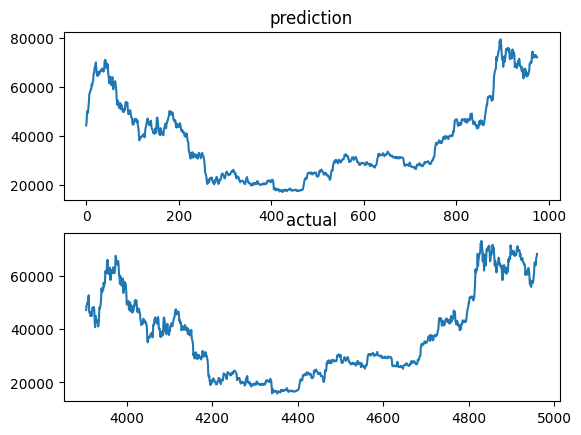

In [26]:
dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(nrows=2,ncols=1)
harsh1.plot(y_pred)
harsh1.set_title('prediction')
harsh2.plot(y_actual,label='actual')
harsh2.set_title('actual')

In [27]:
part1=(ev/data.Open.mean())*100

In [28]:
accuracy1=100-part1
accuracy1

77.57161962855977

**conv 1D Model**

In [29]:
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.Conv1D(32,5,activation='relu',padding='same'),
    tensorflow.keras.layers.Conv1D(64,5,activation='relu',padding='same'),
    tensorflow.keras.layers.Conv1D(128,5,activation='relu',padding='same'),
    tensorflow.keras.layers.Conv1D(64,5,activation='relu',padding='same'),
    tensorflow.keras.layers.Dense(32,activation='relu'),
    tensorflow.keras.layers.Dense(7,activation='relu')
    ])

In [30]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=100),
              loss=tensorflow.keras.losses.MeanAbsoluteError(),
              )

In [31]:
model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
122/122 [==============================] - 4s 16ms/step - loss: 6034.7886 - val_loss: 33855.8086
Epoch 2/100
122/122 [==============================] - 1s 10ms/step - loss: 6029.0767 - val_loss: 33954.4805
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 6027.1172 - val_loss: 34677.6406
Epoch 4/100
122/122 [==============================] - 1s 6ms/step - loss: 6031.3535 - val_loss: 33615.6445
Epoch 5/100
122/122 [==============================] - 1s 6ms/step - loss: 6032.1909 - val_loss: 33587.0039
Epoch 6/100
122/122 [==============================] - 1s 6ms/step - loss: 6031.2769 - val_loss: 34085.3242
Epoch 7/100
122/122 [==============================] - 1s 6ms/step - loss: 6021.0210 - val_loss: 34313.2617
Epoch 8/100
122/122 [==============================] - 1s 5ms/step - loss: 6003.0176 - val_loss: 33951.8242
Epoch 9/100
122/122 [==============================] - 1s 6ms/step - loss: 6018.6777 - val_loss: 34316.0781
Epoch 10/100
122/122 [====

In [32]:
ev2=model.evaluate(xtest,ytest)

31/31 [==============================] - 0s 4ms/step - loss: 33708.1367


In [33]:
y_pred2=model.predict(xtest)
y_pred2=numpy.squeeze(y_pred2)

31/31 [==============================] - 0s 4ms/step


In [103]:
data.Open.mean()

12461.542353274934

In [102]:
accuracy2=(33708.1367/data.Open.mean())*100
accuracy2

270.4973087953386

Text(0.5, 1.0, 'actual')

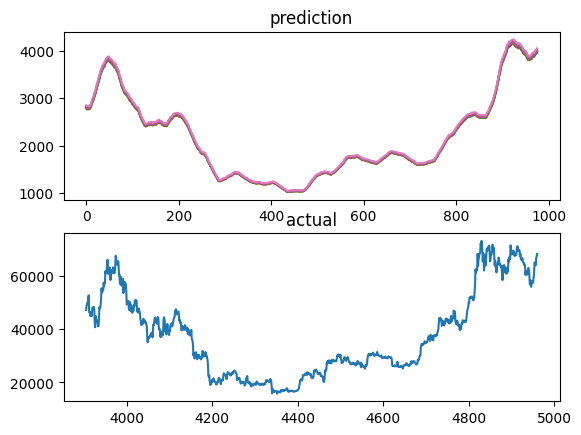

In [34]:
dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(nrows=2,ncols=1)
harsh1.plot(y_pred2)
harsh1.set_title('prediction')
harsh2.plot(y_actual,label='actual')
harsh2.set_title('actual')

**one one model**

In [104]:
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.Dense(1000,activation='relu'),
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dense(64,activation='relu'),
    tensorflow.keras.layers.Dense(1)])

In [36]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError())

In [37]:
data.Open.shape

(4960,)

In [38]:
arr=numpy.array(data.Open)

In [39]:
x_train,y_train=[],[]
for i in range(1,4960):
  x_train.append(arr[i-1])
  y_train.append(arr[i])

In [40]:
x_train=numpy.array(x_train)
y_train=numpy.array(y_train)

In [41]:
x_train.shape

(4959,)

In [42]:
4959-992

3967

In [43]:
x_train,x_test,y_train,y_test=x_train[0:3967],x_train[3967:],y_train[0:3967],y_train[3967:]

In [44]:
x_train,y_train

(array([2.48000000e-01, 2.49900000e-01, 2.65000000e-01, ...,
        6.18559419e+04, 6.12900816e+04, 6.09393597e+04]),
 array([2.49900000e-01, 2.65000000e-01, 2.65000000e-01, ...,
        6.12900816e+04, 6.09393597e+04, 6.31674346e+04]))

In [ ]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
124/124 [==============================] - 2s 7ms/step - loss: 752.4490 - val_loss: 1586.2343
Epoch 2/100
124/124 [==============================] - 1s 6ms/step - loss: 238.4624 - val_loss: 1038.7063
Epoch 3/100
124/124 [==============================] - 1s 6ms/step - loss: 224.9564 - val_loss: 1298.6327
Epoch 4/100
124/124 [==============================] - 1s 5ms/step - loss: 276.4708 - val_loss: 930.3713
Epoch 5/100
124/124 [==============================] - 1s 6ms/step - loss: 230.8662 - val_loss: 787.0281
Epoch 6/100
124/124 [==============================] - 1s 6ms/step - loss: 280.1620 - val_loss: 2109.1252
Epoch 7/100
124/124 [==============================] - 1s 5ms/step - loss: 245.3363 - val_loss: 737.7718
Epoch 8/100
124/124 [==============================] - 1s 5ms/step - loss: 222.7361 - val_loss: 932.3795
Epoch 9/100
124/124 [==============================] - 1s 5ms/step - loss: 235.1070 - val_loss: 1100.1276
Epoch 10/100
124/124 [============================

In [ ]:
ev=model.evaluate(x_test,y_test)

In [ ]:
y_pred_3=model.predict(x_test)

In [ ]:
y_pred_3=numpy.squeeze(y_pred_3)

In [ ]:
dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(nrows=2,ncols=1)
harsh1.plot(y_pred_3)
harsh1.set_title('prediction')
harsh2.plot(y_actual,label='actual')
harsh2.set_title('actual')

**RNN model**

**first rnn only GRU model**

In [ ]:
model_x=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.GRU(32,activation='relu',return_sequences=True),
    tensorflow.keras.layers.GRU(64,activation='relu',return_sequences=True),
    tensorflow.keras.layers.GRU(32,activation='relu'),
    tensorflow.keras.layers.Dense(1)
])

In [ ]:
model_x.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError())

In [ ]:
model_x.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

In [ ]:
model_x.evaluate(xtest,ytest)

In [ ]:
def make_graph(y_pred):
  dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(nrows=2,ncols=1)
  harsh1.plot(y_pred)
  harsh1.set_title('prediction')
  harsh2.plot(y_actual,label='actual')
  harsh2.set_title('actual')

In [ ]:
ypred=model_x.predict(xtest)

In [ ]:
make_graph(ypred)

**only RNN LSTM model**

In [ ]:
model_y=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.LSTM(64,activation='relu',return_sequences=True),
    tensorflow.keras.layers.LSTM(32,activation='relu',return_sequences=True),
    tensorflow.keras.layers.LSTM(64,activation='relu'),
    tensorflow.keras.layers.Dense(1)
])

In [ ]:
model_y.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError())

In [ ]:
model_y.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

In [ ]:
ev=model_y.evaluate(xtest,ytest)

In [ ]:
ypred=model_x.predict(xtest)

In [ ]:
make_graph(ypred)

**only RNN birirectional LSTM model**

In [ ]:
model_z=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Lambda(lambda x:tensorflow.expand_dims(x,axis=1)),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64,activation='relu',return_sequences=True)),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(32,activation='relu',return_sequences=True)),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64,activation='relu')),
    tensorflow.keras.layers.Dense(1)
])

In [ ]:
model_z.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError())

In [65]:
model_z.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
122/122 [==============================] - 11s 31ms/step - loss: 1993.8162 - val_loss: 3092.8081
Epoch 2/100
122/122 [==============================] - 1s 9ms/step - loss: 638.5377 - val_loss: 2596.4253
Epoch 3/100
122/122 [==============================] - 1s 10ms/step - loss: 572.0909 - val_loss: 2002.9055
Epoch 4/100
122/122 [==============================] - 1s 9ms/step - loss: 580.0221 - val_loss: 3345.1570
Epoch 5/100
122/122 [==============================] - 1s 9ms/step - loss: 540.4030 - val_loss: 1863.7949
Epoch 6/100
122/122 [==============================] - 1s 9ms/step - loss: 537.7303 - val_loss: 1901.2443
Epoch 7/100
122/122 [==============================] - 1s 9ms/step - loss: 537.0282 - val_loss: 2257.2551
Epoch 8/100
122/122 [==============================] - 1s 9ms/step - loss: 481.8311 - val_loss: 1775.6725
Epoch 9/100
122/122 [==============================] - 1s 9ms/step - loss: 469.8752 - val_loss: 1730.1906
Epoch 10/100
122/122 [====================

In [66]:
ev=model_z.evaluate(xtest,ytest)

31/31 [==============================] - 0s 4ms/step - loss: 1532.9479


In [67]:
ypred=model_z.predict(xtest)

31/31 [==============================] - 1s 4ms/step


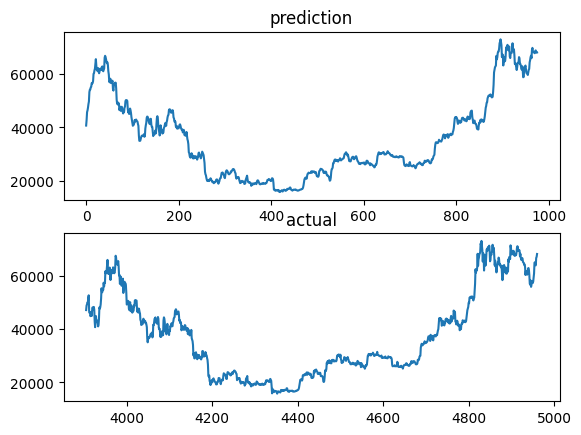

In [68]:
make_graph(ypred)

**N-beats model**

In [89]:
def n_beats_block(input_shape, lstm_units=64, num_layers=2):
    inputs = tensorflow.keras.layers.Input(shape=[30,])
    x = tensorflow.keras.layers.Lambda(lambda x: tensorflow.expand_dims(x, axis=1))(inputs) # Pass 'inputs' to the Lambda layer
    for _ in range(num_layers):
        x = tensorflow.keras.layers.LSTM(lstm_units, return_sequences=True)(x)
    x = tensorflow.keras.layers.LSTM(lstm_units)(x)
    block_output = tensorflow.keras.layers.Dense(7)(x)

    model = tensorflow.keras.models.Model(inputs=inputs, outputs=block_output)
    return model

# Example usage:
block = n_beats_block(input_shape=(10, 1))  # Example input shape

In [90]:
block.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 30)]              0         
                                                                 
 lambda_13 (Lambda)          (None, 1, 30)             0         
                                                                 
 lstm_21 (LSTM)              (None, 1, 64)             24320     
                                                                 
 lstm_22 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_23 (LSTM)              (None, 64)                33024     
                                                                 
 dense_26 (Dense)            (None, 7)                 455       
                                                                 
Total params: 90823 (354.78 KB)
Trainable params: 90823 (35

In [91]:
block.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.MeanAbsoluteError())

In [92]:
block.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
122/122 [==============================] - 8s 18ms/step - loss: 6095.4966 - val_loss: 35864.4492
Epoch 2/100
122/122 [==============================] - 1s 7ms/step - loss: 6088.1040 - val_loss: 35857.6758
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 6083.2373 - val_loss: 35851.5938
Epoch 4/100
122/122 [==============================] - 1s 7ms/step - loss: 6078.8037 - val_loss: 35845.6875
Epoch 5/100
122/122 [==============================] - 1s 6ms/step - loss: 6074.2207 - val_loss: 35839.7344
Epoch 6/100
122/122 [==============================] - 1s 7ms/step - loss: 6069.5898 - val_loss: 35834.1836
Epoch 7/100
122/122 [==============================] - 1s 10ms/step - loss: 6065.7422 - val_loss: 35827.4805
Epoch 8/100
122/122 [==============================] - 1s 10ms/step - loss: 6062.2725 - val_loss: 35821.8320
Epoch 9/100
122/122 [==============================] - 1s 10ms/step - loss: 6056.2402 - val_loss: 35815.8242
Epoch 10/100
122/122 [==

In [93]:
ev=block.evaluate(xtest,ytest)

31/31 [==============================] - 0s 6ms/step - loss: 35862.0586


In [96]:
ypred=block.predict(xtest)
ypred=numpy.squeeze(ypred)

31/31 [==============================] - 0s 3ms/step


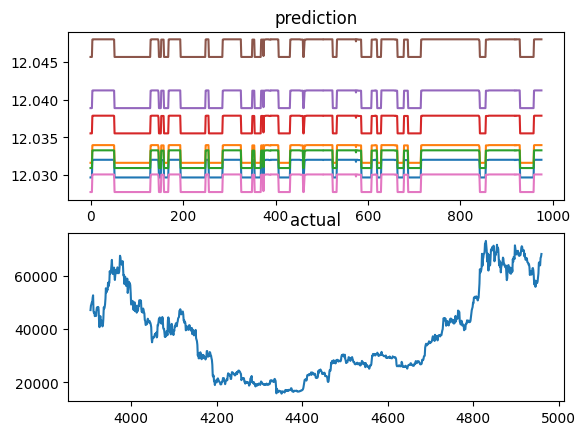

In [97]:
make_graph(ypred)